In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def draw_scatter(X, Y, Z, title=None, s=plt.rcParams['lines.markersize'] ** 2):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    sc = ax.scatter(X, Y, Z, c=np.arange(len(Z)), marker='.', s=s)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(10, 30)
    fig.colorbar(sc, shrink=0.7, label="Ordine di estrazione")
    ax.set_title(title)
    ax.set_box_aspect(None, zoom=0.85)
    #fig.legend()
    
    plt.show()
    return fig, ax

In [42]:
def draw_plot_of_radius(r, err, title=None, exact_value=1.5):
    xs = np.arange(len(r))
    plt.errorbar(xs, r, yerr=err, label="Monte Carlo")
    plt.axhline(exact_value, color="tab:orange", label="Valore esatto")
    plt.title(title)
    plt.xlabel("Blocco")
    plt.ylabel(r"$\langle r\rangle$")
    plt.legend()
    plt.grid()

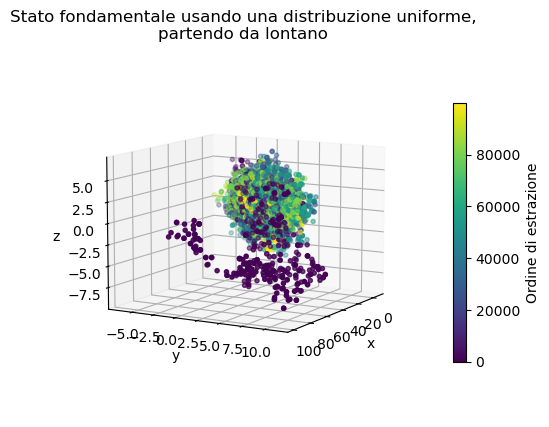

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: title={'center': 'Stato fondamentale usando una distribuzione uniforme,\npartendo da lontano'}, xlabel='x', ylabel='y', zlabel='z'>)

In [59]:
X, Y, Z = np.loadtxt("out_GS_faraway.dat", usecols=(0, 1, 2), unpack=True)
draw_scatter(X, Y, Z, title="Stato fondamentale usando una distribuzione uniforme,\npartendo da lontano")

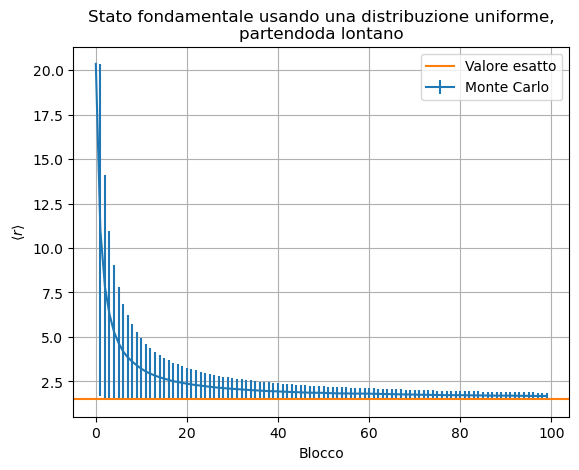

In [60]:
r_faraway, err_faraway = np.loadtxt("out_r_GS_faraway.dat", usecols=(0, 1), unpack=True)
draw_plot_of_radius(r_faraway, err_faraway, title="Stato fondamentale usando una distribuzione uniforme,\npartendoda lontano")

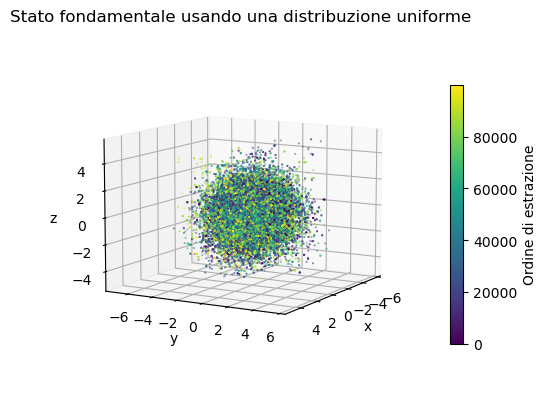

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: title={'center': 'Stato fondamentale usando una distribuzione uniforme'}, xlabel='x', ylabel='y', zlabel='z'>)

In [36]:
X, Y, Z = np.loadtxt("out_GS.dat", usecols=(0, 1, 2), unpack=True)
draw_scatter(X, Y, Z, title="Stato fondamentale usando una distribuzione uniforme", s=1)

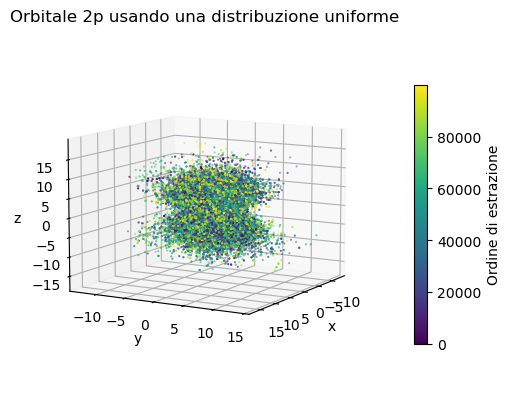

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: title={'center': 'Orbitale 2p usando una distribuzione uniforme'}, xlabel='x', ylabel='y', zlabel='z'>)

In [37]:
X, Y, Z = np.loadtxt("out_2p.dat", usecols=(0, 1, 2), unpack=True)
draw_scatter(X, Y, Z, title="Orbitale 2p usando una distribuzione uniforme", s=1)

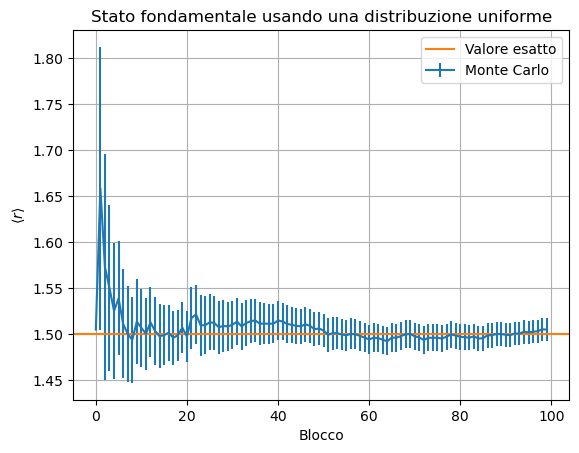

In [43]:
r_GS, err_GS = np.loadtxt("out_r_GS.dat", usecols=(0, 1), unpack=True)
draw_plot_of_radius(r_GS, err_GS, title="Stato fondamentale usando una distribuzione uniforme")

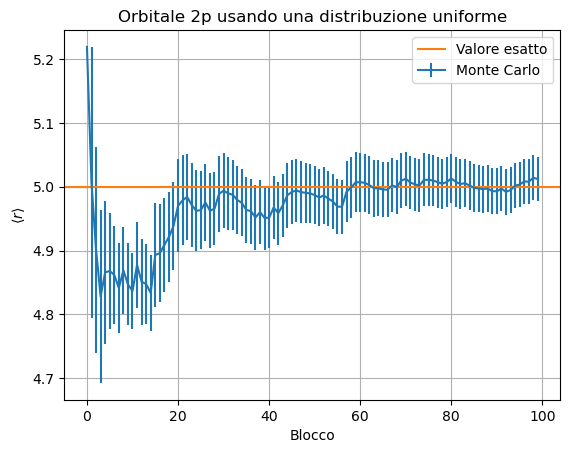

In [44]:
r_2p, err_2p = np.loadtxt("out_r_2p.dat", usecols=(0, 1), unpack=True)
draw_plot_of_radius(r_2p, err_2p, title="Orbitale 2p usando una distribuzione uniforme", exact_value=5)

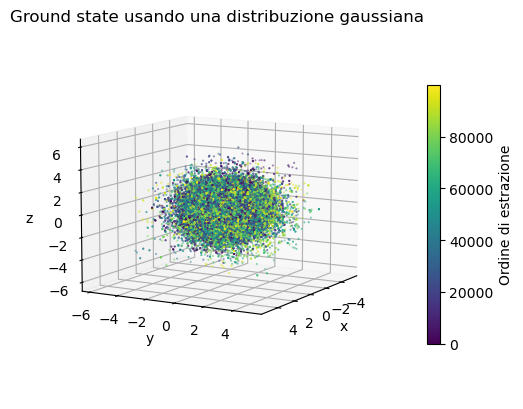

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: title={'center': 'Ground state usando una distribuzione gaussiana'}, xlabel='x', ylabel='y', zlabel='z'>)

In [49]:
X, Y, Z = np.loadtxt("out_GS_gauss.dat", usecols=(0, 1, 2), unpack=True)
draw_scatter(X, Y, Z, title="Ground state usando una distribuzione gaussiana", s=1)

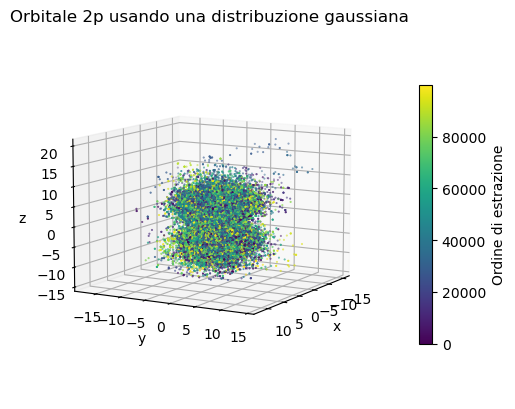

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: title={'center': 'Orbitale 2p usando una distribuzione gaussiana'}, xlabel='x', ylabel='y', zlabel='z'>)

In [50]:
X, Y, Z = np.loadtxt("out_2p_gauss.dat", usecols=(0, 1, 2), unpack=True)
draw_scatter(X, Y, Z, title="Orbitale 2p usando una distribuzione gaussiana", s=1)

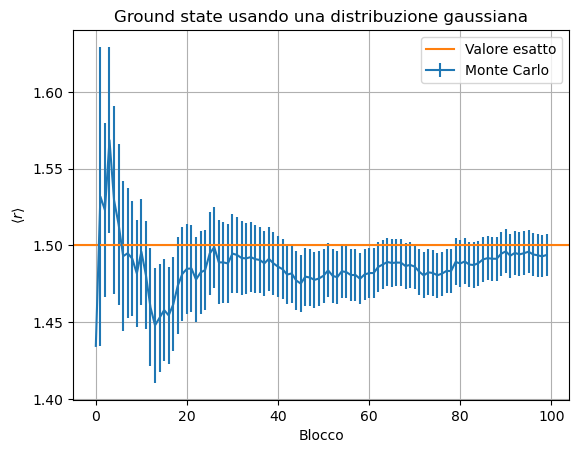

In [51]:
r_GS_g, err_GS_g = np.loadtxt("out_r_GS_gauss.dat", usecols=(0, 1), unpack=True)
draw_plot_of_radius(r_GS_g, err_GS_g, title="Ground state usando una distribuzione gaussiana")

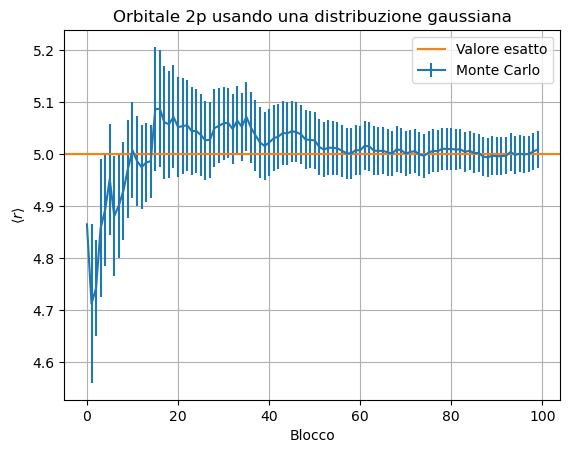

In [52]:
r_2p_g, err_2p_g = np.loadtxt("out_r_2p_gauss.dat", usecols=(0, 1), unpack=True)
draw_plot_of_radius(r_2p_g, err_2p_g, title="Orbitale 2p usando una distribuzione gaussiana", exact_value=5)